In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Classification
===============

Get some data to play with

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['target', 'DESCR', 'images', 'target_names', 'data'])

In [3]:
#digits.images is numpy array 
digits.images.shape

(1797, 8, 8)

In [4]:
# each image has gray scale values in a 8*8 matrix
print(digits.images[9])

[[  0.   0.  11.  12.   0.   0.   0.   0.]
 [  0.   2.  16.  16.  16.  13.   0.   0.]
 [  0.   3.  16.  12.  10.  14.   0.   0.]
 [  0.   1.  16.   1.  12.  15.   0.   0.]
 [  0.   0.  13.  16.   9.  15.   2.   0.]
 [  0.   0.   0.   3.   0.   9.  11.   0.]
 [  0.   0.   0.   0.   9.  15.   4.   0.]
 [  0.   0.   9.  12.  13.   3.   0.   0.]]


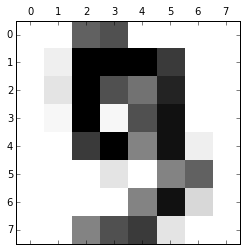

In [5]:
#draw matrix figure with plt.matshow

plt.matshow(digits.images[9], cmap=plt.cm.Greys)

In [6]:
# each image with 64 digits
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
# check if the image is correct, first image with 0 should be in target zero.
print(np.unique(digits.target))
digits.target

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, ..., 8, 9, 8])

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [9]:
# split 75% train and 25% test
# digits.data ~ X_train, X_test, pixels for images
# digits.target ~ y_train, y_test, result with number 0~9
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Compare SVM and Random Forrest (Really Simple API)
-------------------
0) Import your model class

In [10]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [11]:
svm = LinearSVC(C=0.1)

2) Fit the model

In [12]:
svm.fit(X_train, y_train)
# trained result is stored in SVM object

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

3) Apply / evaluate

In [13]:
# return a class label for each image data
print(svm.predict(X_train))
print(y_train)

[3 7 6 ..., 7 9 1]
[3 7 6 ..., 7 9 1]


In [14]:
# score must be with the test truth
# fraction of correctly predicated samples; arg, data, truth label
svm.score(X_train, y_train)

0.99331848552338531

In [15]:
svm.score(X_test, y_test)

# evaluate model accuracy

0.94888888888888889

Random Forrest
---------

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# n_estimators number of trees in forest, random_state make result reproducible
rf = RandomForestClassifier(n_estimators=50, random_state = 1)

In [18]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [19]:
rf.predict(X_test)

array([5, 5, 2, 7, 5, 2, 9, 3, 9, 0, 5, 4, 8, 9, 3, 3, 9, 1, 9, 7, 5, 6, 8,
       6, 2, 5, 3, 9, 9, 5, 9, 2, 0, 5, 2, 3, 1, 4, 4, 6, 9, 4, 5, 2, 5, 0,
       1, 1, 6, 6, 4, 4, 7, 0, 9, 3, 7, 0, 4, 8, 9, 4, 3, 6, 2, 0, 2, 4, 4,
       9, 8, 0, 4, 7, 3, 4, 9, 7, 1, 4, 8, 8, 6, 6, 2, 2, 8, 7, 4, 1, 8, 8,
       9, 1, 4, 5, 4, 1, 1, 5, 8, 8, 1, 8, 0, 6, 6, 2, 0, 0, 8, 6, 2, 3, 4,
       4, 8, 5, 0, 8, 4, 3, 0, 8, 0, 3, 5, 2, 5, 4, 9, 7, 6, 4, 6, 9, 3, 8,
       9, 4, 1, 9, 8, 1, 9, 7, 3, 0, 0, 5, 4, 7, 1, 8, 2, 8, 1, 5, 4, 7, 2,
       4, 3, 3, 8, 4, 5, 6, 0, 6, 5, 0, 7, 8, 8, 8, 7, 4, 3, 1, 8, 5, 6, 4,
       1, 7, 4, 6, 9, 0, 4, 7, 7, 9, 3, 8, 7, 1, 8, 5, 5, 4, 2, 1, 3, 5, 7,
       7, 8, 7, 3, 7, 0, 9, 7, 8, 6, 7, 7, 5, 9, 9, 4, 7, 2, 0, 2, 4, 0, 6,
       7, 5, 7, 8, 2, 4, 0, 6, 4, 8, 2, 6, 7, 3, 1, 2, 2, 6, 4, 3, 9, 1, 9,
       6, 6, 3, 7, 5, 3, 4, 3, 5, 7, 4, 8, 6, 0, 0, 8, 5, 5, 1, 3, 2, 7, 2,
       1, 5, 3, 9, 4, 0, 5, 8, 1, 3, 6, 4, 9, 8, 8, 9, 1, 9, 8, 6, 1, 2, 3,
       2, 7,

In [20]:
rf.score(X_test, y_test)
# random forest better

0.9622222222222222

#Two features (x,y), two classes (red, blue), train-full color,  test~opaque color

<h1>Classifier Comparison</h1>
<img src="classifier_comparison.png" width=100%>

Labels Can Be Anything (mapping number to array)
=============================

In [40]:
numbers = np.array(["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"])

In [43]:
# as train is only numbers 0-9, it will transform to index for new string array and do the mapping
y_train_string = numbers[y_train]
svm.fit(X_train, y_train_string)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [44]:
svm.predict(X_test)

array(['zero', 'nine', 'seven', 'eight', 'nine', 'three', 'zero', 'four',
       'seven', 'two', 'five', 'five', 'eight', 'one', 'zero', 'one',
       'zero', 'two', 'eight', 'five', 'one', 'three', 'three', 'nine',
       'one', 'two', 'one', 'two', 'four', 'five', 'zero', 'five', 'zero',
       'six', 'seven', 'four', 'two', 'four', 'three', 'eight', 'one',
       'five', 'zero', 'one', 'four', 'three', 'one', 'one', 'three',
       'five', 'seven', 'four', 'eight', 'six', 'nine', 'four', 'one',
       'six', 'three', 'one', 'eight', 'nine', 'two', 'eight', 'five',
       'two', 'two', 'zero', 'seven', 'zero', 'seven', 'nine', 'four',
       'one', 'two', 'zero', 'seven', 'two', 'nine', 'seven', 'two', 'one',
       'seven', 'four', 'three', 'four', 'two', 'five', 'seven', 'seven',
       'seven', 'five', 'one', 'five', 'five', 'seven', 'seven', 'three',
       'nine', 'five', 'five', 'two', 'seven', 'four', 'five', 'seven',
       'five', 'three', 'one', 'two', 'seven', 'six', 'one'